In [9]:
import pandas as pd
import json
import matplotlib.pyplot as plt
df = pd.read_csv("./batch_test_results.csv",encoding = "ISO-8859-1")
df['Config No.'] = df.index
for i in df["Config No."]:
    with open('./configs/config_'+str(i)+'.json') as json_file:  
        data = json.load(json_file)
        df.at[i, 'backoff'] = data['Layers'][0]['Backoff']
        df.at[i, 'condition'] = data['Layers'][0]['Condition']
        df.at[i, 'threshold'] = data['Layers'][0]['Threshold']
        df.at[i, 'threshold_float'] = data['Layers'][0]['ThresholdFloat']
        df.at[i, 'merger'] = data['Layers'][0]['Merger']
        df.at[i, 'splitter'] = data['Layers'][0]['Splitter']
        df.at[i, 'stepsize'] = data['Layers'][0]['Stepsize']
        df.at[i, 'parallel execution'] = data['Layers'][0]['ParallelExecutions']
df[:10]



,Config No.,set,median,mean,variance,top1,top5,top10,sampleSize,#subjects,duration,memoryAllocation,backoff,condition,threshold,threshold_float,merger,splitter,stepsize,parallel execution
0,0,0,1,20.951400,94.848740,71.680857,79.066877,82.941282,848698,848698,1.517431e+07,797.805851,splitProperty,tooUnlikelyRecommendationsCondition,1.0,0.09,max,everySecondItem,,0.0
1,1,0,1,20.951400,94.848740,71.680857,79.066877,82.941282,848698,848698,1.482297e+07,799.376988,splitProperty,tooUnlikelyRecommendationsCondition,1.0,0.09,max,twoSupportRanges,,0.0
2,2,0,1,20.951400,94.848740,71.680857,79.066877,82.941282,848698,848698,1.482225e+07,798.847878,splitProperty,tooUnlikelyRecommendationsCondition,1.0,0.09,avg,everySecondItem,,0.0
3,3,0,1,20.951400,94.848740,71.680857,79.066877,82.941282,848698,848698,1.485129e+07,798.695160,splitProperty,tooUnlikelyRecommendationsCondition,1.0,0.09,avg,twoSupportRanges,,0.0
4,4,0,1,4.604137,31.465783,87.317625,92.048805,94.405104,446675,446675,1.254161e+07,753.016018,deleteLowFrequency,tooUnlikelyRecommendationsCondition,1.0,0.09,,,stepsizeProportional,1.0
5,5,0,1,15.324402,70.561714,75.006494,81.551152,85.120068,819997,819997,1.116370e+07,762.495018,deleteLowFrequency,tooUnlikelyRecommendationsCondition,1.0,0.09,,,stepsizeProportional,2.0
6,6,0,1,12.277624,58.464192,77.565307,83.422155,86.767344,840640,840640,1.598585e+07,773.584226,deleteLowFrequency,tooUnlikelyRecommendationsCondition,1.0,0.09,,,stepsizeProportional,3.0
7,7,0,1,10.256079,51.262770,79.674692,84.989744,88.081876,841911,841911,2.160493e+07,786.408987,deleteLowFrequency,tooUnlikelyRecommendationsCondition,1.0,0.09,,,stepsizeProportional,4.0
8,8,0,1,8.790465,44.511439,81.140772,86.123667,89.082595,840676,840676,2.753907e+07,794.016457,deleteLowFrequency,tooUnlikelyRecommendationsCondition,1.0,0.09,,,stepsizeProportional,5.0
9,9,0,1,8.098487,41.929060,82.218616,86.950328,89.779857,838090,838090,3.339860e+07,799.158278,deleteLowFrequency,tooUnlikelyRecommendationsCondition,1.0,0.09,,,stepsizeProportional,6.0


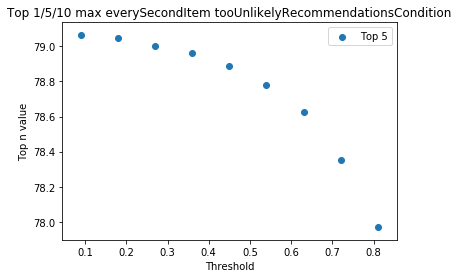

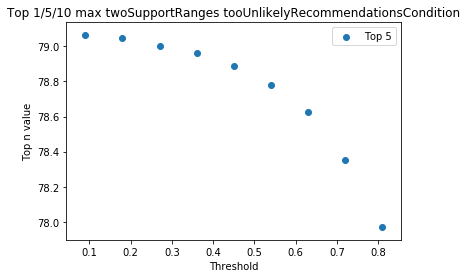

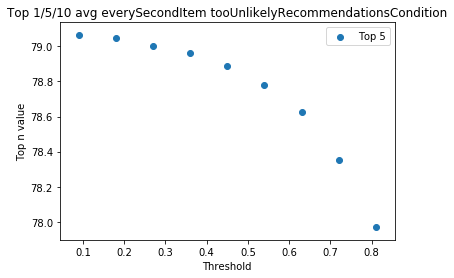

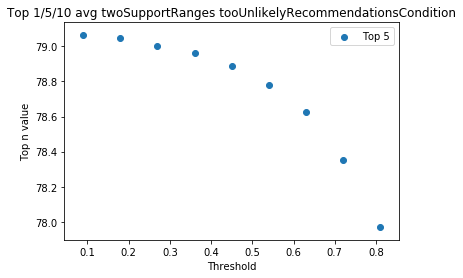

-------------------------------


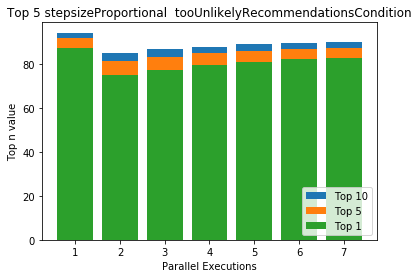

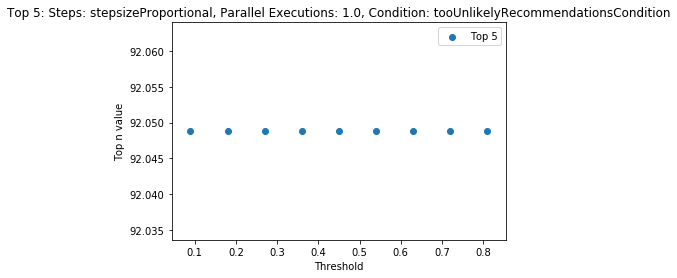

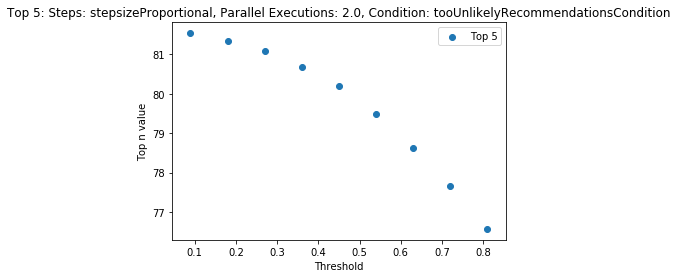

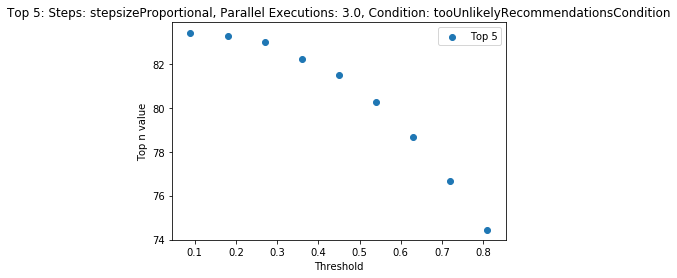

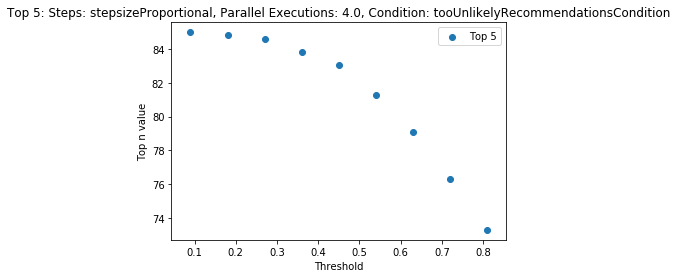

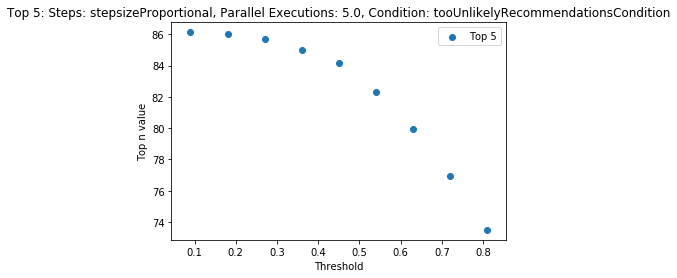

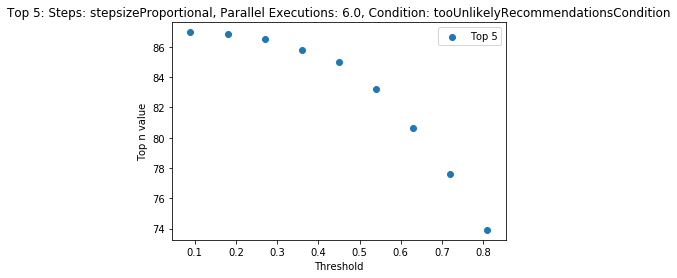

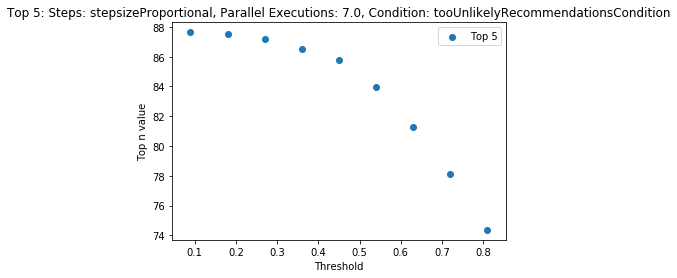

In [18]:
#split property:
df_sp = df[df['backoff'] == 'splitProperty']
#print(df_sp[:10])
for val1 in df['merger'].unique():
    for val2 in df['splitter'].unique(): 
        for val3 in df['condition'].unique():
            if val1 != '' and val2 != '' and val3 !='':
                df_r = df_sp[(df_sp['merger']==val1) & (df_sp['splitter']==val2) & (df_sp['condition']==val3)]
                plt.scatter(df_r['threshold_float'],df_r['top5'], label="Top 5")
               #plt.bar(df_r['Config No.'],df_r['top10'], label="Top 10")
                plt.title("Top 1/5/10 " +val1 +" "+ val2 +" "+ val3)
                plt.xlabel("Threshold")
                plt.ylabel("Top n value")
                plt.legend()
                plt.show()
                
print("-------------------------------")
df_sp2 = df[df['backoff'] == 'deleteLowFrequency']
#print(df_sp[:10])
for val1 in df['stepsize'].unique():
    for val3 in df['condition'].unique():
        if val1 != '' and val3 !='':
            df_r = df_sp2[(df_sp2['stepsize']==val1) & (df_sp2['condition']==val3)]
            plt.bar(df_r['parallel execution'],df_r['top10'], label="Top 10")
            plt.bar(df_r['parallel execution'],df_r['top5'], label="Top 5")
            plt.bar(df_r['parallel execution'],df_r['top1'], label="Top 1")
            plt.xlabel("Parallel Executions")
            plt.ylabel("Top n value")
            plt.title("Top 5 " +val1 +" "+ val2 +" "+ val3)
            plt.legend(loc="lower right")
            plt.show()

for val1 in df['stepsize'].unique():
    for val2 in df['parallel execution'].unique():
        for val3 in df['condition'].unique(): 
            if val1 != '' and val2 !=0 and val3 !='':
                df_l = df_sp2[(df_sp2['stepsize']==val1) & (df_sp2['parallel execution']==val2) &(df_sp2['condition']==val3)]
                plt.scatter(df_l['threshold_float'],df_l['top5'], label="Top 5")
               #plt.bar(df_r['Config No.'],df_r['top10'], label="Top 10")
                plt.title("Top 5: Steps: " +val1 +", Parallel Executions: "+ str(round(val2, 9))+ ", Condition: "+ val3)
                plt.xlabel("Threshold")
                plt.ylabel("Top n value")
                plt.legend()
                plt.show()



            
